In [69]:
from tkinter import *
import os, sys
import time
import tkinter
import os
from tkinter import messagebox
import datetime
from selenium import webdriver
from selenium.webdriver.common.keys import Keys 
import requests
import pandas as pd
from textblob import TextBlob
from tqdm._tqdm_notebook import tqdm_notebook

In [70]:
def scrape(num_tweets, keyword, start_date, stop_date, save_location):
    scrolls = 300
    url = 'https://twitter.com/search?q='
    url = url + keyword + ' ' + "since%3A" + str(start_date)[:-9] + ' until%3A' + str(stop_date)[:-9]
    #print(url)
    browser = webdriver.Chrome("C:\\Users\\elonm\\chromedriver.exe")
    #browser = webdriver.Chrome()
    browser.get(url)
    time.sleep(0.5)
    body = browser.find_element_by_tag_name('body')
    for _ in range(scrolls):
        body.send_keys(Keys.PAGE_DOWN)
        time.sleep(0.5)
    #tweets = browser.find_elements_by_class_name('tweet-text')
    print("Scraping now!")
    tweets = browser.find_elements_by_xpath('/html/body/div/div/div/div/div/div/div/div/div/div/div/div/ol/li/div/div/div/p[@class="TweetTextSize  js-tweet-text tweet-text"]')
    favorites = browser.find_elements_by_xpath('/html/body/div/div/div/div/div/div/div/div/div/div/div/div/ol/li/div/div/div/div/div[@class="ProfileTweet-action ProfileTweet-action--favorite js-toggleState"]/button[@class="ProfileTweet-actionButton js-actionButton js-actionFavorite"]/span/span')
    comments =  browser.find_elements_by_xpath('/html/body/div/div/div/div/div/div/div/div/div/div/div/div/ol/li/div/div/div/div/div[@class="ProfileTweet-action ProfileTweet-action--reply"]/button[@class="ProfileTweet-actionButton js-actionButton js-actionReply"]/span/span')
    retweets  = browser.find_elements_by_xpath('/html/body/div/div/div/div/div/div/div/div/div/div/div/div/ol/li/div/div/div/div/div[@class="ProfileTweet-action ProfileTweet-action--retweet js-toggleState js-toggleRt"]/button[@class="ProfileTweet-actionButton  js-actionButton js-actionRetweet"]/span/span')
    timestamp = browser.find_elements_by_xpath('/html/body/div/div/div/div/div/div/div/div/div/div/div/div/ol/li/div/div/div/small/a/span[1]')
    print("Scraping Done!")
    print(len(tweets), len(retweets), len(favorites), len(timestamp),  len(comments))
    print("Making Dataframe. . .")
    data = pd.DataFrame()
    text = []
    times = []
    fav = []
    com = []
    retwee = []
    for x in tweets:
        text.append(x.text) 
    for x in timestamp:
        times.append(x.text)
    for x in favorites:
        fav.append(x.text)
    for x in comments:
        com.append(x.text)
    for x in retweets:
        retwee.append(x.text)
    data['tweets'] = text
    data['timestamp'] = times 
    data['favorite'] = fav
    data['reply'] = com
    data['retweet'] = retwee
    print("Finished making dataframe!")
    print(data.shape, data.head())
    save_location = "C:/Users/elonm/Desktop/BasicTwitterScraper-master"
    data.to_csv(save_location+"/scaped_data.csv", header=True)

In [71]:
# root = tkinter.Tkinter.Tk()
# root.configure(background='black')
window = Tk()
window.resizable(False, False)
window.title("Mr_TweetALot")
# window.geometry('600x500')
window.config(bg='white')

# num_tweets = ''
# keyword = ''
# start_date = ''
# stop_date = ''
# keyword = ''
# save_location = ''

#All labels go below
lbl1 = Label(window, text="Enter the number of tweets to be scraped:", font=("Arial Bold", 15), bg='white', anchor='ne')
lbl1.grid(column=0, row=3)
lbl2 = Label(window, text="From Date(YYYY-MM-DD):", font=("Arial Bold", 15), bg='white', anchor='ne')
lbl2.grid(column=0, row=4)
lbl3 = Label(window, text="To Date(YYYY-MM-DD):", font=("Arial Bold", 15), bg='white')
lbl3.grid(column=0, row=5)
lbl4 = Label(window, text="Search Keys:", font=("Arial Bold", 15), bg='white')
lbl4.grid(column=0, row=6)
lbl5 = Label(window, text="Save Location:", font=("Arial Bold", 15), bg='white')
lbl5.grid(column=0, row=7)
#Labels end

def clicked():
    num_tweets = txt1.get()
    start_date = txt2.get()
    stop_date = txt3.get()
    keyword = txt4.get()
    save_location = txt5.get()
    if num_tweets=='' or start_date == '' or stop_date == '' or keyword == '' or save_location == '':
        messagebox.showerror("Missing Input", "Please fill in all the fields before scraping.")
    if num_tweets.isnumeric() == False:
        print("catch")
        messagebox.showerror("Invalid Input", "The value of number of tweets should be numeric only.")
    num_tweets = round(int(num_tweets))
    if num_tweets < 1:
        messagebox.showerror("Invalid Input", "The value of number of tweets should be more than 0.")
    start_date = datetime.datetime.strptime(start_date, "%Y-%m-%d")
    stop_date = datetime.datetime.strptime(stop_date, "%Y-%m-%d")
    if start_date > stop_date:
        messagebox.showerror("Value Error", "Start date can't be bigger than stop-date")
    current_date =  datetime.datetime.now()
    if stop_date > current_date:
        messagebox.showerror("Value Error", "Date can't be in the future")
    messagebox.showinfo("", "Scraping now. . .\nYou'll be notified when finished.")
    scrape(num_tweets, keyword, start_date, stop_date, save_location)
    messagebox.showinfo("DONE SCRAPING!", "You data has been stored at the location specified.")
    #lbl1.configure(text= res)

#All buttons go below
btn1 = Button(window, text="About", bg="#1DA1F2", fg="white", font=("Arial Bold", 10), borderwidth=0)
btn1.grid(row = 0, column= 1)
btn2 = Button(window, text="Usage", bg="#1DA1F2", fg="white", font=("Arial Bold", 10), borderwidth=0)
btn2.grid(row = 0, column = 2)
btn = Button(window, text="Begin Scraping!", bg="#1DA1F2", fg="white", command=clicked, font=("Arial Bold", 20), borderwidth=0)
btn.grid(column=0, row=10)
#Buttons end

#Text Boxes 
txt1= Entry(window,width=20)
txt1.grid(column=2, row = 3)
txt2= Entry(window,width=20)
txt2.grid(column=2, row=4)
txt3= Entry(window,width=20)
txt3.grid(column=2, row=5)
txt4= Entry(window,width=20)
txt4.grid(column=2, row=6)
txt5= Entry(window,width=20)
txt5.grid(column=2, row=7)
#Text Boxes end

window.mainloop()

Scraping now!
Scraping Done!
311 311 311 311 311
Making Dataframe. . .


Exception in Tkinter callback
Traceback (most recent call last):
  File "D:\Anaconda3\lib\tkinter\__init__.py", line 1702, in __call__
    return self.func(*args)
  File "<ipython-input-71-b1f0d419e0e3>", line 51, in clicked
    scrape(num_tweets, keyword, start_date, stop_date, save_location)
  File "<ipython-input-70-0c4bc39930c7>", line 39, in scrape
    retwee.append(x.text)
  File "D:\Anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py", line 76, in text
    return self._execute(Command.GET_ELEMENT_TEXT)['value']
  File "D:\Anaconda3\lib\site-packages\selenium\webdriver\remote\webelement.py", line 633, in _execute
    return self._parent.execute(command, params)
  File "D:\Anaconda3\lib\site-packages\selenium\webdriver\remote\webdriver.py", line 321, in execute
    self.error_handler.check_response(response)
  File "D:\Anaconda3\lib\site-packages\selenium\webdriver\remote\errorhandler.py", line 242, in check_response
    raise exception_class(message, screen, stack

Sentiment of people towards the movie(-1 to +1): 0.12294243982791472 %
Positive Word ration in reviews: 0.35278154681139756


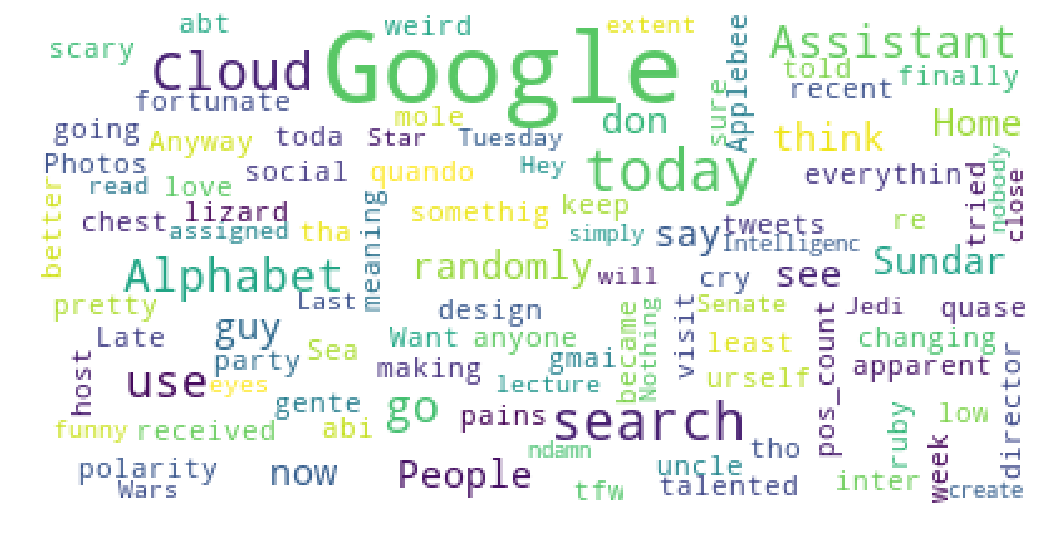

In [72]:
data = pd.read_csv(r"C:\Users\elonm\Desktop\BasicTwitterScraper-master\scaped_data.csv", index_col=False)
data['polarity'] = data['tweets'].apply(lambda s: TextBlob(s).sentiment.polarity)
pos_words = pd.read_csv(r"C:\Users\elonm\Desktop\BasicTwitterScraper-master\pos.txt", header=None)
neg_words = pd.read_csv(r"C:\Users\elonm\Desktop\BasicTwitterScraper-master\neg.txt", header=None)
#Return count of sentimental words in a sentence
def count_pos(sentence):
    sentence = sentence.lower()
    count = 0
    for word in sentence.split():
        for sent_word in pos_words[0]:
            if sent_word in word:
                count += 1
    return count
def count_neg(sentence):
    sentence = sentence.lower()
    count = 0
    for word in sentence.split():
        for sent_word in neg_words[0]:
            if sent_word in word:
                count += 1
    return count
data['pos_count'] = data['tweets'].apply(lambda s: count_pos(s))
data['neg_count'] = data['tweets'].apply(lambda s: count_neg(s))
data = data[['tweets', 'polarity', 'pos_count', 'neg_count']]
pol = data['polarity'].mean()
n1 = data['pos_count'].sum()
n2 = data['neg_count'].sum()
print("Sentiment of people towards the movie(-1 to +1):",pol,"%")
print("Positive Word ration in reviews:",str(n1/(n1+n2)))
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
mpl.rcParams['figure.figsize']=(20.0,20.0)
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['font.size']=10                 
mpl.rcParams['figure.subplot.bottom']=.1 
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=100,
                        max_font_size=40, random_state=42).generate(str(data))
fig = plt.figure(figsize=(18,18))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()